In [60]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

df = pd.read_excel('FET_Data.xls') 
df.rename(columns={'INF. REASON': 'Infertility Reason', 'SPERM' : 'SPERM EVALUATION'}, inplace=True)
df.columns = df.columns.str.upper()
df['DAMORPHOUS TESEE'] = pd.to_datetime(df['DAMORPHOUS TESEE'], errors='coerce').dt.date
print(df.head())


   EMBRYO AGE (DAY)             OPERAMORPHOUS TESEION DAMORPHOUS TESEE  AGE  \
0                 4  Intracytoplasmic Sperm Injection       2018-05-05   42   
1                 4  Intracytoplasmic Sperm Injection       2018-06-02   44   
2                 4  Intracytoplasmic Sperm Injection       2018-05-05   42   
3                 4  Intracytoplasmic Sperm Injection       2018-06-01   43   
4                 4  Intracytoplasmic Sperm Injection       2018-08-10   48   

   SPOUSE AGE INFERTILITY REASON SPERM EVALUATION  OOCYTE COUNT  M2 OOCYTE  \
0          46                NaN              Age             5          4   
1          40                NaN              Age             1          1   
2          39                NaN              Age             9          4   
3          41                NaN              Age             2          1   
4          36                NaN              Age             1          1   

   2 PN  TR. DAY  TR. ED. EMB.  PREGNANCY  
0     3     

In [61]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   EMBRYO AGE (DAY)       3678 non-null   int64 
 1   OPERAMORPHOUS TESEION  3677 non-null   object
 2   DAMORPHOUS TESEE       3664 non-null   object
 3   AGE                    3678 non-null   int64 
 4   SPOUSE AGE             3678 non-null   int64 
 5   INFERTILITY REASON     3558 non-null   object
 6   SPERM EVALUATION       3675 non-null   object
 7   OOCYTE COUNT           3678 non-null   int64 
 8   M2 OOCYTE              3678 non-null   int64 
 9   2 PN                   3678 non-null   int64 
 10  TR. DAY                3678 non-null   int64 
 11  TR. ED. EMB.           3678 non-null   int64 
 12  PREGNANCY              3678 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 373.7+ KB
None


In [62]:
print(df.describe())

       EMBRYO AGE (DAY)          AGE   SPOUSE AGE  OOCYTE COUNT    M2 OOCYTE  \
count       3678.000000  3678.000000  3678.000000   3678.000000  3678.000000   
mean           4.669114    33.504350    36.890973     10.452692     8.143828   
std            0.470596     5.861641     6.492381      5.754691     4.695542   
min            4.000000    17.000000    19.000000      1.000000     1.000000   
25%            4.000000    29.000000    32.000000      6.000000     5.000000   
50%            5.000000    34.000000    36.000000      9.000000     7.000000   
75%            5.000000    38.000000    41.000000     14.000000    11.000000   
max            5.000000    52.000000    72.000000     45.000000    37.000000   

              2 PN      TR. DAY  TR. ED. EMB.    PREGNANCY  
count  3678.000000  3678.000000   3678.000000  3678.000000  
mean      6.893692     4.669114      1.520120     0.600326  
std       3.975429     0.470596      0.507762     0.489898  
min       1.000000     4.000000    

In [65]:
print(df.isnull().sum())


EMBRYO AGE (DAY)           0
OPERAMORPHOUS TESEION      1
DAMORPHOUS TESEE          14
AGE                        0
SPOUSE AGE                 0
INFERTILITY REASON       120
SPERM EVALUATION           3
OOCYTE COUNT               0
M2 OOCYTE                  0
2 PN                       0
TR. DAY                    0
TR. ED. EMB.               0
PREGNANCY                  0
dtype: int64


In [67]:
null_counts = df.isnull().sum()
total_rows = len(df)
null_percentage = (null_counts / total_rows) * 100

under_threshold_columns = null_percentage[null_percentage < 5]

print("Columns with null percentage under 5%:")
print(under_threshold_columns)


Columns with null percentage under 5%:
EMBRYO AGE (DAY)         0.000000
OPERAMORPHOUS TESEION    0.027189
DAMORPHOUS TESEE         0.380642
AGE                      0.000000
SPOUSE AGE               0.000000
INFERTILITY REASON       3.262643
SPERM EVALUATION         0.081566
OOCYTE COUNT             0.000000
M2 OOCYTE                0.000000
2 PN                     0.000000
TR. DAY                  0.000000
TR. ED. EMB.             0.000000
PREGNANCY                0.000000
dtype: float64


In [69]:
cleaned_df = df.dropna()
print(cleaned_df.isnull().sum())


EMBRYO AGE (DAY)         0
OPERAMORPHOUS TESEION    0
DAMORPHOUS TESEE         0
AGE                      0
SPOUSE AGE               0
INFERTILITY REASON       0
SPERM EVALUATION         0
OOCYTE COUNT             0
M2 OOCYTE                0
2 PN                     0
TR. DAY                  0
TR. ED. EMB.             0
PREGNANCY                0
dtype: int64


/var/folders/07/ch6l1hqx33j6h_3ck2cgrv3h0000gn/T/ipykernel_65455/986456825.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


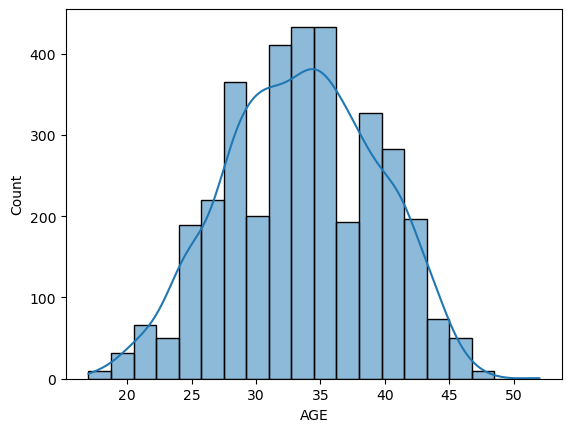

In [70]:
with pd.option_context('mode.use_inf_as_na', True):
    sns.histplot(data=cleaned_df, x='AGE', bins=20, kde=True)
    plt.show()

In [71]:
cleaned_df.columns

Index(['EMBRYO AGE (DAY)', 'OPERAMORPHOUS TESEION', 'DAMORPHOUS TESEE', 'AGE',
       'SPOUSE AGE', 'INFERTILITY REASON', 'SPERM EVALUATION', 'OOCYTE COUNT',
       'M2 OOCYTE', '2 PN', 'TR. DAY', 'TR. ED. EMB.', 'PREGNANCY'],
      dtype='object')

In [73]:
cleaned_df.loc[:, 'AGE_DIFFERENCE'] = cleaned_df['SPOUSE AGE'] - cleaned_df['AGE']
print(cleaned_df['AGE_DIFFERENCE'].describe())


count    3542.000000
mean        3.396951
std         4.969773
min       -22.000000
25%         0.000000
50%         3.000000
75%         6.000000
max        32.000000
Name: AGE_DIFFERENCE, dtype: float64


In [75]:
cleaned_df = cleaned_df.copy()

cleaned_df['SPOUSE AGE_log'] = np.log(cleaned_df['SPOUSE AGE'])

mean_age = cleaned_df['SPOUSE AGE'].mean()
std_age = cleaned_df['SPOUSE AGE'].std()
cleaned_df['SPOUSE AGE_z_score'] = (cleaned_df['SPOUSE AGE'] - mean_age) / std_age
outliers = cleaned_df[np.abs(cleaned_df['SPOUSE AGE_z_score']) > 3]
cleaned_df.loc[cleaned_df['SPOUSE AGE'] < 0, 'SPOUSE AGE'] = 0


In [78]:
output_csv_path = 'cleaned_data.csv'
cleaned_df.to_csv(output_csv_path, index=False)
print(f"Cleaned data saved to '{output_csv_path}'.")

Cleaned data saved to 'cleaned_data.csv'.


In [79]:
cleaned_df.head()

,EMBRYO AGE (DAY),OPERAMORPHOUS TESEION,DAMORPHOUS TESEE,AGE,SPOUSE AGE,INFERTILITY REASON,SPERM EVALUATION,OOCYTE COUNT,M2 OOCYTE,2 PN,TR. DAY,TR. ED. EMB.,PREGNANCY,AGE_DIFFERENCE,SPOUSE AGE_log,SPOUSE AGE_z_score
5,4,Intracytoplasmic Sperm Injection,2019-01-11,44,51,Age,Amorphous TESE,8,5,3,4,2,0,7,3.931826,2.173961
6,4,Intracytoplasmic Sperm Injection,2019-01-11,44,51,Age,Amorphous TESE,8,5,3,4,2,0,7,3.931826,2.173961
7,4,TESE,2014-06-24,28,28,Azoospermia,Amorphous TESE,16,13,13,4,2,0,0,3.332205,-1.367055
8,4,Intracytoplasmic Sperm Injection,2014-07-05,30,38,Endometrioma + Male,Amorphous TESE,3,3,3,4,2,0,8,3.637586,0.172517
9,4,Intracytoplasmic Sperm Injection,2016-11-15,32,31,Male,Amorphous TESE,23,22,17,4,2,1,-1,3.433987,-0.905183
